In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def layer_size(X,Y,h = 1):
    n_x = X.shape[0]
    n_h = h
    n_y = Y.shape[0]
    l_size = {
        "n_x":n_x,
        "n_h":n_h,
        "n_y":n_y
    }
    return l_size

In [25]:
def ini_parameters(n_x,n_h,n_y):
    
    np.random.seed(2)
     
    W1=np.random.randn(n_h,n_x)* (np.sqrt(1/ n_x))
    b1=np.zeros((n_h,1))
    
    W2=np.random.randn( n_y,n_h)* (np.sqrt(1/n_h)) 
    b2=np.zeros((n_y,1))
    
    parameters = {
        "W1": W1,
        "W2": W2,
        "b1": b1,
        "b2": b2
    }
    return parameters

In [26]:
test_X = np.array([[1],[3]]).T
test_Y = np.array([[1],[0]]).T
n_h=1
test_size = layer_size(test_X,test_Y,n_h)
n_x = test_size["n_x"]
n_y = test_size["n_y"]
test_parameters= ini_parameters(n_x,n_h,n_y)
print(test_X.shape)
print(test_Y.shape)
print("n_x=" + str(n_x))
print("n_y=" + str(n_y))
print("X=" + str(test_X))
print("Y=" + str(test_Y))
print("W1=" + str(test_parameters["W1"]))
print("W2=" + str(test_parameters["W2"]))
print("b1=" + str(test_parameters["b1"]))
print("b2=" + str(test_parameters["b2"]))

(1, 2)
(1, 2)
n_x=1
n_y=1
X=[[1 3]]
Y=[[1 0]]
W1=[[-0.41675785]]
W2=[[-0.05626683]]
b1=[[0.]]
b2=[[0.]]


In [27]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))

In [28]:
z=np.array([13,0.4])
test_sigmoid=sigmoid(z)
test_sigmoid

array([0.99999774, 0.59868766])

In [29]:
def cost_function(A,Y,lambd,parameters):
    W1=parameters["W1"]
    W2=parameters["W2"]
    m=Y.shape[1]
    L2_regularization_cost = (lambd/(2*m))*(np.sum(np.square(W1))+np.sum(np.square(W2)))
    cost= (-1 / m) * ( np.sum( Y * np.log(A) + (1 - Y) * np.log(1 - A) ) ) + L2_regularization_cost
    return cost

In [30]:
test_A= np.array([[0.9],[0.02]]).T
test_lambd = 0.1
test_cost = cost_function(test_A,test_Y,test_lambd ,test_parameters)
test_cost

0.06720293796817685

In [31]:
def forward_propagation(X,parameters):
    
    "We initializing parameters"
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1= np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    return A2,cache

In [32]:
test_A2,test_cache = forward_propagation(test_X,test_parameters)
test_cost = cost_function(test_A2,test_Y,test_lambd,test_parameters)
print("A2" + str(test_A2))
print(test_Y)
print(test_cache)
print(test_cost)

A2[[0.50554481 0.51193137]]
[[1 0]]
{'Z1': array([[-0.41675785, -1.25027354]]), 'A1': array([[-0.39419558, -0.84836033]]), 'Z2': array([[0.02218013, 0.04773454]]), 'A2': array([[0.50554481, 0.51193137]])}
0.7041302542625567


In [33]:
def backpropagation(parameters, cache, X, Y, lambd):
    
    A2 = cache["A2"]
    A1 = cache["A1"]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    m = X.shape[1]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T) + (lambd/m) * W2
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1,X.T) + (lambd/m) * W1
    db1 = (1/m) * np.sum(dZ1,axis=1,keepdims=True)
    
    grads={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    return grads

In [34]:
test_grads= backpropagation(test_parameters,test_cache,test_X,test_Y,lambd=0.1)
test_grads

{'dW1': array([[-0.02119907]]),
 'db1': array([[0.00771236]]),
 'dW2': array([[-0.12250845]]),
 'db2': array([[0.00873809]])}

In [35]:
def gradient_descent(parameters,grads,learning_rate):
    
    "Initializing grads"
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    "Initializing parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
                                            
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [36]:
def model(X, Y, n_h, num_iterations = 1000, print_cost = False, learning_rate = 0.005 ,lambd=0):
    l_size = layer_size(X,Y,n_h)
    n_x = l_size["n_x"]
    n_y = l_size["n_y"]
    cost_acom=np.array([[]])
    epoch = np.array([[]])
    parameters = ini_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = float(np.squeeze(cost_function(A,Y,lambd,parameters))) # makes sure cost is the dimension we expect.

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backpropagation(parameters, cache, X, Y,lambd)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = gradient_descent(parameters, grads,learning_rate)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            cost_acom = np.append(cost_acom,[[cost]])
            epoch = np.append(epoch,[[i]])
#             print("parameters " + str(parameters))
#             print("predict " + str(A))
    
    return parameters,epoch,cost_acom

In [37]:
import pandas as pd
trainingset = pd.read_csv(r"C:\Users\cristian\Downloads\trainingset.csv")
devset = pd.read_csv(r"C:\Users\cristian\Downloads\devset.csv")
trainingset.head()

,Gender,Height,Weight
0,Female,154,132
1,Male,191,62
2,Female,167,135
3,Male,171,141
4,Female,179,103


In [38]:
bygender = trainingset.groupby("Gender")
bygender["Gender"].describe()

,count,unique,top,freq
Gender,,,,
Female,196,1,Female,196
Male,196,1,Male,196


In [39]:
bygender2 = devset.groupby("Gender")
bygender2["Gender"].describe()

,count,unique,top,freq
Gender,,,,
Female,49,1,Female,49
Male,49,1,Male,49


In [40]:
(trainingset["Height"],trainingset["Weight"])

(0      154
 1      191
 2      167
 3      171
 4      179
       ... 
 387    184
 388    150
 389    164
 390    148
 391    191
 Name: Height, Length: 392, dtype: int64, 0      132
 1       62
 2      135
 3      141
 4      103
       ... 
 387    152
 388     74
 389     71
 390     67
 391    146
 Name: Weight, Length: 392, dtype: int64)

In [41]:
(devset["Height"],devset["Weight"])

(0     198
 1     172
 2     187
 3     169
 4     179
      ... 
 93    147
 94    157
 95    151
 96    152
 97    164
 Name: Height, Length: 98, dtype: int64, 0     109
 1      90
 2     130
 3     110
 4      56
      ... 
 93    107
 94    103
 95     55
 96     98
 97     71
 Name: Weight, Length: 98, dtype: int64)

In [42]:
# CHANGES tag Male and Female to 1 & 0 

gender = {'Male': 1,'Female': 2}

trainingset.Gender[trainingset.Gender =='Male'] = 1
trainingset.Gender[trainingset.Gender =='Female'] = 0
devset.Gender[devset.Gender =='Male'] = 1
devset.Gender[devset.Gender =='Female'] =0

#Training set 
X = np.array([[trainingset["Height"][0],trainingset["Weight"][0]]])
Y = np.array([[trainingset["Gender"][0]]])

#dev set
X_test=np.array([[devset["Height"][0],devset["Weight"][0]]])
Y_test = np.array([[devset["Gender"][0]]])

print("before transpose")
print("X=" + str(X))
print("Y=" + str(Y))
print("X_test=" + str(X_test))
print("Y_test=" + str(Y_test))

#training and dev size
num1=392
num2=49

#adds values to X,Y,X_test & Y_TEST
for i in range(1,num1):
    X = np.append(X,[[trainingset["Height"][i],trainingset["Weight"][i]]],axis = 0)
    Y = np.append(Y,[[trainingset["Gender"][i]]],axis=0)
for i in range(1,num2):
    X_test= np.append(X_test,[[devset["Height"][i],devset["Weight"][i]]],axis = 0)
    Y_test = np.append(Y_test,[[devset["Gender"][i]]],axis=0)
    
# Shows shape of X,Y,X_test & Y_TEST
print("training shape")
print(X.shape)
print(Y.shape)
print("dev shape")
print(X_test.shape)
print(Y_test.shape)

#transpose data
X= X.T
X_test=X_test.T
Y=Y.T
Y_test=Y_test.T
#
print("after transpose")
print("X=" + str(X))
print("Y=" + str(Y))

print("training shape")
print(X.shape)
print(Y.shape)
print("dev shape")
print(X_test.shape)
print(Y_test.shape)

# X=np.array([[1,2],[3,4]]).T
# Y=np.array([[1],[0]]).T


before transpose
X=[[154 132]]
Y=[[0]]
X_test=[[198 109]]
Y_test=[[1]]
training shape
(392, 2)
(392, 1)
dev shape
(49, 2)
(49, 1)
after transpose
X=[[154 191 167 171 179 144 187 142 142 169 151 140 189 147 174 172 190 181
  174 170 160 144 177 166 155 178 173 159 182 170 161 152 182 184 153 169
  150 154 168 180 164 188 188 157 184 193 191 175 169 172 158 184 155 164
  183 140 195 183 160 196 179 169 168 184 182 163 195 168 140 191 179 170
  145 167 151 168 192 147 148 175 183 155 177 187 151 148 146 190 151 145
  166 171 149 156 187 185 168 156 166 160 190 145 162 168 165 156 161 190
  172 194 174 159 141 197 177 178 192 145 187 194 194 165 153 173 166 150
  166 142 149 195 171 180 157 144 157 191 195 144 149 154 163 178 140 180
  187 170 167 151 141 167 182 188 166 172 155 141 193 176 192 186 175 157
  190 185 188 177 187 160 191 168 161 178 161 164 153 154 153 158 157 149
  171 174 161 199 180 148 140 157 190 189 168 197 146 186 177 168 162 169
  194 159 163 150 159 172 196 176 166 

C:\Users\cristian\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cristian\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cristian\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\cristian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: Sett

In [43]:
n_h=12
parameters,epoch,cost_acom= model(X, Y, n_h, num_iterations = 14000, print_cost=True,learning_rate=0.3,lambd=0.1)

Cost after iteration 0: 0.721564
Cost after iteration 1000: 0.693278
Cost after iteration 2000: 0.692911
Cost after iteration 3000: 0.694252
Cost after iteration 4000: 0.694038
Cost after iteration 5000: 0.693941
Cost after iteration 6000: 0.693696
Cost after iteration 7000: 0.693718
Cost after iteration 8000: 0.693608
Cost after iteration 9000: 0.693681
Cost after iteration 10000: 0.693373
Cost after iteration 11000: 0.692076
Cost after iteration 12000: 0.693326
Cost after iteration 13000: 0.691962


In [44]:
parameters

{'W1': array([[-0.10093353, -0.01362712],
        [-0.51735994,  0.39725305],
        [-0.43434764, -0.20386067],
        [ 0.40559096, -1.1003908 ],
        [-0.25622278, -0.22015026],
        [ 0.13355526,  0.55514407],
        [ 0.01006032, -0.27074754],
        [ 0.25770664, -0.21664671],
        [-0.00463317,  0.28457058],
        [-0.18112498,  0.0021858 ],
        [-0.21266673, -0.0378864 ],
        [ 0.13307965, -0.53819213]]), 'b1': array([[-9.54431517e-15],
        [ 2.10334526e-11],
        [ 0.00000000e+00],
        [-1.99178060e-02],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 4.44367316e-14],
        [ 9.94996987e-04],
        [ 9.87354946e-14],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [-1.04335651e-02]]), 'W2': array([[-0.03302099, -0.02287291, -0.0625674 , -0.10559342, -0.14004025,
         -0.0156557 , -0.02612314,  0.24724665, -0.24121108,  0.01162479,
          0.03710605,  0.29896008]]), 'b2': array([[-0.00794127]])}

In [45]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = cache["A2"]
    ### END CODE HERE ###
    
    return predictions

In [46]:
predictions = predict(parameters, X_test)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.49895579106250426


In [47]:
cost_acom

array([0.72156417, 0.69327833, 0.6929109 , 0.69425204, 0.69403764,
       0.69394094, 0.69369611, 0.69371844, 0.69360789, 0.69368064,
       0.69337257, 0.6920756 , 0.69332568, 0.69196235])

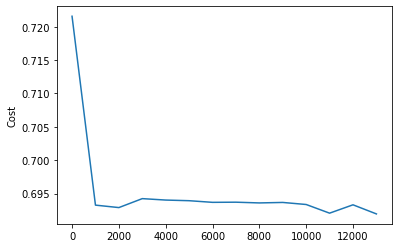

In [48]:
plt.plot(epoch,cost_acom)
plt.ylabel('Cost')
plt.show()

In [49]:
predictions

array([[0.50624112, 0.50624112, 0.50624112, 0.50624112, 0.45357928,
        0.50624112, 0.50624112, 0.50623709, 0.50624112, 0.50624112,
        0.50624112, 0.50624112, 0.45357884, 0.50624112, 0.50624112,
        0.50624112, 0.50624112, 0.46481251, 0.50624112, 0.50624112,
        0.50624112, 0.50624109, 0.50624112, 0.50624112, 0.50624112,
        0.50624112, 0.45424581, 0.45358363, 0.50624101, 0.50600902,
        0.50624112, 0.50624112, 0.50624112, 0.50624112, 0.50624112,
        0.50622481, 0.50624112, 0.50624112, 0.45357988, 0.50624112,
        0.50624112, 0.5062411 , 0.50624112, 0.50624112, 0.45357928,
        0.50624111, 0.50624112, 0.50624112, 0.50624112]])

In [50]:
cost_function(predictions,Y_test,0.1,parameters)

0.7006067394397099

In [51]:
# # Print accuracy
# print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

In [52]:
(predictions[0]>=0.5).astype('uint8')

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1], dtype=uint8)

In [53]:
(Y_test[0]==1).astype('uint8')

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1], dtype=uint8)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score((Y_test[0] == 1).astype('uint8'), (predictions[0]>=0.5).astype('uint8'))

0.4489795918367347

In [55]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix((Y_test[0] == 1).astype('uint8'), (predictions[0]>=0.5).astype('uint8')).ravel()
(tn, fp, fn, tp)

(3, 23, 4, 19)

In [56]:
from sklearn.metrics import classification_report
classification_report((Y_test[0] == 1).astype('uint8'), (predictions[0]>=0.5).astype('uint8'))

'              precision    recall  f1-score   support\n\n           0       0.43      0.12      0.18        26\n           1       0.45      0.83      0.58        23\n\n    accuracy                           0.45        49\n   macro avg       0.44      0.47      0.38        49\nweighted avg       0.44      0.45      0.37        49\n'